#                                                   Accident  Severity Predictor

##  Introduction           

Driving is a necessity now for various reasons. People need to drive for work, for attending personal trips, for droping family members, for shopping etc. Having a personal car and ability to drive actually make a person independent.


However with the heavy traffic, driving skills, bad weather chances of happening an accident is very high. The chaos that an accident make will really damage the life of impacted people it can even cause death.If there is a way that can let people know the chances of getting into an accident and the severity of accident they can take some precautionary measure to avoid it.This project aims to build a model that predict the severity of accident.



## DataSource

The dataset contains collision data collected from 2004 to 2020 from Seattle, WA, from GISWEB.
Data consist of 194763 entries with 38 columns. With accident serverity as the predicting variable, features such as date and time of incident, collision type, junction type, location, weather condition, road condition, light condition, Car speeding, and under the influence of drug , inattentdence, pedestrian rights will be used for this analysis. This dataset is imbalanced with majority of the serverity in properties damage only collision, which makes up about 70% of the data, making classification more difficult. Some exploratory analysis is performed here in the notebook to understand data well.

As we need to predit the Severity code based on the history of data , KNN model technique in Supervised Machine learning can be used for classification.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("C:\Ceema\Data Science Course Era\FinalCapstone\Data-Collisions.csv")
df.shape

C:\Users\CEEMARAJITH\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(194673, 38)

In [3]:
df.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Checking for missing data

In [4]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


Totalcount of missing data

In [5]:
missing_data.sum().sum()

1100024

Count of missing data column wise

In [6]:
missing_data.sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [7]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

We have datapoints of class '1' severity code and class '2' we need to predit the severity code in our train data set.

In [8]:
df['LOCATION'].value_counts() 

BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N    276
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB    271
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N          265
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                    254
6TH AVE AND JAMES ST                                              252
                                                                 ... 
S MAIN ST BETWEEN TEMPLE PL S AND 28TH W AVE S                      1
5TH AVE S BETWEEN S CHICAGO ST AND S KENYON E ST                    1
SWIFT AVE S AND S WILLOW ST                                         1
42ND AVE E AND E MADISON ST                                         1
LATONA AVE NE BETWEEN NE 56TH ST AND NE 57TH ST                     1
Name: LOCATION, Length: 24102, dtype: int64

#### Visualization techniques can be used for analysis

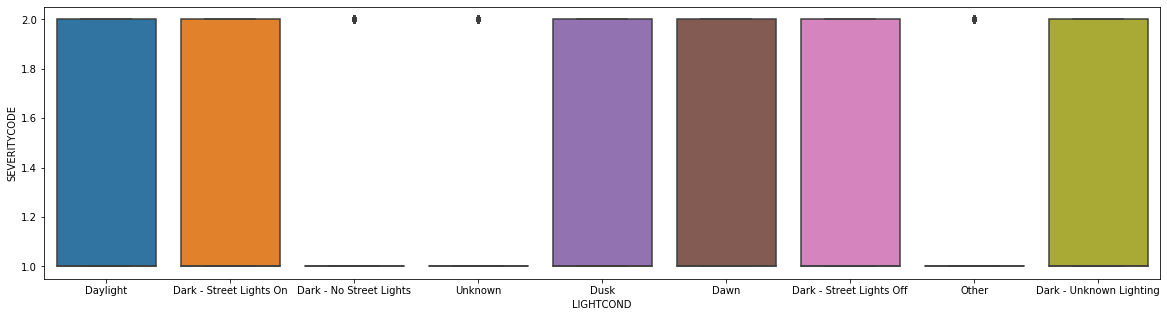

In [38]:
#df.hist(column='LIGHTCOND', bins=50) this need numerical values
#for categorical values sns plot is better
plt.figure(figsize=(20,5))
sns.boxplot(x="LIGHTCOND", y="SEVERITYCODE", data=df)

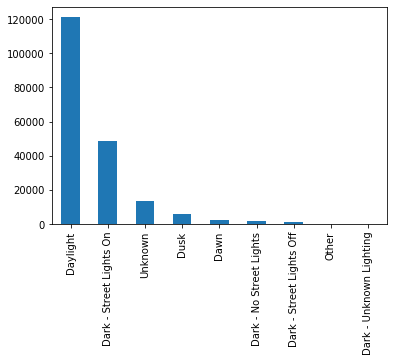

In [39]:
df['LIGHTCOND'].value_counts().plot(kind='bar')

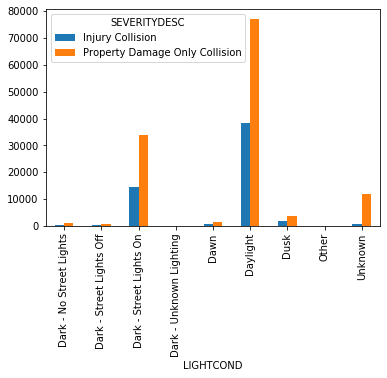

In [4]:

df.groupby(['LIGHTCOND','SEVERITYDESC']).ADDRTYPE.count().unstack().plot(kind='bar')

## Inference from Data analaysis
All rows have severity code - which is our target Y variable, so no need to drop any rows.
Lets build our feature set. Given Important columns are 'LOCATION','ROADCOND','WEATHER','JUNCTIONTYPE','LIGHTCOND','SPEEDING','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT'. SPEEDING has lot of missing value compared to other columns so that need not be considered in the featureset. PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT'<- this has no missing counts. 
lets replace missing one's in ROADCOND,WEATHER,JUNCTIONTYPE and LIGHTCOND with the most frequent one's.


There are so many different location so that says it doesnt play an important role in deciding severity code lets remove it from feature set.
So the final feature codes are 'ROADCOND','WEATHER','JUNCTIONTYPE','LIGHTCOND','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT'
Lets do the Data Cleanup now
## Data Cleanup

In [9]:
df['ROADCOND'].value_counts() 

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [10]:
df["ROADCOND"].replace(np.nan, "Dry", inplace=True)
df['ROADCOND'].value_counts() 

Dry               129522
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [11]:
df['WEATHER'].value_counts() 

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [12]:
df["WEATHER"].replace(np.nan, "Clear", inplace=True)
df['WEATHER'].value_counts() 

Clear                       116216
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [13]:
df['JUNCTIONTYPE'].value_counts() 

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [14]:
df["JUNCTIONTYPE"].replace(np.nan, "Mid-Block (not related to intersection)", inplace=True)
df['JUNCTIONTYPE'].value_counts() 

Mid-Block (not related to intersection)              96129
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [15]:
df['LIGHTCOND'].value_counts() 

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [16]:
df["LIGHTCOND"].replace(np.nan, "Daylight", inplace=True)
df['LIGHTCOND'].value_counts() 

Daylight                    121307
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [17]:
ft_df=df[['ROADCOND','WEATHER','JUNCTIONTYPE','LIGHTCOND','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']]
ft_df.shape

(194673, 8)

In [18]:
ft_df.isnull().sum().sum()

0

Now the selected set of feature is not having any null values. We got a clean data set.

In [19]:
ft_df.dtypes

ROADCOND        object
WEATHER         object
JUNCTIONTYPE    object
LIGHTCOND       object
PERSONCOUNT      int64
PEDCOUNT         int64
PEDCYLCOUNT      int64
VEHCOUNT         int64
dtype: object

Now we need to transorm the categorical values of  ROADCOND,WEATHER,JUNCTIONTYPE,LIGHTCOND to numeric ones     

In [20]:
ft_df['LIGHTCOND'].replace(to_replace=['Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting'], value=[0,1,2,3,4,5,6,7,8],inplace=True)
ft_df['WEATHER'].replace(to_replace=['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'], value=[0,1,2,3,4,5,6,7,8,9,10],inplace=True)
ft_df['ROADCOND'].replace(to_replace=['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'], value=[0,1,2,3,4,5,6,7,8],inplace=True)
ft_df['JUNCTIONTYPE'].replace(to_replace =['Mid-Block (not related to intersection)' ,'At Intersection (intersection related)','Mid-Block (but intersection related)','Driveway Junction' , 'At Intersection (but not related to intersection)', 'Ramp Junction' ,'Unknown'],value=[0,1,2,3,4,5,6],inplace=True)  
ft_df.head()

C:\Users\CEEMARAJITH\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,ROADCOND,WEATHER,JUNCTIONTYPE,LIGHTCOND,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
0,1,2,1,0,2,0,0,2
1,1,1,0,1,2,0,0,2
2,0,2,0,0,4,0,0,3
3,0,0,0,0,3,0,0,3
4,1,1,1,0,2,0,0,2


# Feature set
To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [21]:
X_ft = ft_df.values  #.astype(float)
X_ft[0:5]

array([[1, 2, 1, 0, 2, 0, 0, 2],
       [1, 1, 0, 1, 2, 0, 0, 2],
       [0, 2, 0, 0, 4, 0, 0, 3],
       [0, 0, 0, 0, 3, 0, 0, 3],
       [1, 1, 1, 0, 2, 0, 0, 2]], dtype=int64)

In [22]:
Y = df['SEVERITYCODE'].values
Y[0:5]

array([2, 1, 1, 1, 2], dtype=int64)

# Normalize Data
Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [23]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [24]:
X_ft = preprocessing.StandardScaler().fit(X_ft).transform(X_ft.astype(float))
X_ft[0:5]

array([[ 0.72973125,  1.13048669,  0.2452    , -0.58458009, -0.33020207,
        -0.18743029, -0.16958841,  0.12553783],
       [ 0.72973125,  0.22402154, -0.81569302,  0.36551934, -0.33020207,
        -0.18743029, -0.16958841,  0.12553783],
       [-0.59776141,  1.13048669, -0.81569302, -0.58458009,  1.15576451,
        -0.18743029, -0.16958841,  1.7102107 ],
       [-0.59776141, -0.68244361, -0.81569302, -0.58458009,  0.41278122,
        -0.18743029, -0.16958841,  1.7102107 ],
       [ 0.72973125,  0.22402154,  0.2452    , -0.58458009, -0.33020207,
        -0.18743029, -0.16958841,  0.12553783]])

# Prepare test and train data by Splitting

In [25]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ft, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 8) (155738,)
Test set: (38935, 8) (38935,)


# Training/Modelling

In [26]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# Predicting

In [27]:
yhat = kNN_model.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

# Accuracy Evaluvation 
 This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.


In [29]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, kNN_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.715881801487113
Test set Accuracy:  0.7074868370360858


# Finding Best K

In [30]:
# Best k
Ks=15
mean_acc=np.zeros((Ks-1)) #gives an array filled with zeroes
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    print('yhat=', yhat , ' y_test=', y_test)
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

yhat= [1 2 1 ... 1 1 1]  y_test= [2 1 1 ... 1 1 2]
yhat= [1 1 1 ... 1 1 1]  y_test= [2 1 1 ... 1 1 2]
yhat= [1 1 1 ... 1 1 1]  y_test= [2 1 1 ... 1 1 2]
yhat= [1 1 1 ... 1 1 1]  y_test= [2 1 1 ... 1 1 2]
yhat= [1 1 1 ... 1 1 1]  y_test= [2 1 1 ... 1 1 2]
yhat= [1 1 1 ... 1 1 1]  y_test= [2 1 1 ... 1 1 2]
yhat= [1 1 1 ... 1 1 1]  y_test= [2 1 1 ... 1 1 2]
yhat= [1 1 1 ... 1 1 1]  y_test= [2 1 1 ... 1 1 2]
yhat= [1 1 1 ... 1 1 1]  y_test= [2 1 1 ... 1 1 2]
yhat= [1 1 1 ... 1 1 1]  y_test= [2 1 1 ... 1 1 2]
yhat= [1 1 1 ... 1 1 1]  y_test= [2 1 1 ... 1 1 2]
yhat= [1 1 1 ... 1 1 1]  y_test= [2 1 1 ... 1 1 2]
yhat= [1 1 1 ... 1 1 1]  y_test= [2 1 1 ... 1 1 2]
yhat= [1 1 1 ... 1 1 1]  y_test= [2 1 1 ... 1 1 2]


array([0.57213304, 0.72400154, 0.70748684, 0.74192886, 0.71737511,
       0.74552459, 0.732169  , 0.74200591, 0.7383588 , 0.74226275,
       0.73876974, 0.74190317, 0.73743419, 0.74634647])

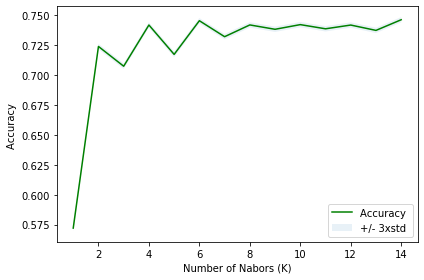

In [31]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [33]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7463464748940541 with k= 14


# jaccard_similarity_score & f1_score

In [37]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )

KNN Jaccard index: 0.75
KNN F1-score: 0.72


C:\Users\CEEMARAJITH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


### With K equals 15, we got a efficient jaccard_similarity_score & f1_score which is close to 1.

This shows wet,dry,sand/mud/dirt, standing water,oil conditions are more prone to accidents